# 소상공인상권(부산스타벅스,이디야)_부산_송정미

## 1. 기본좌표설정

In [1]:
import folium

#부산남구청 위도
latitude = 35.13651365268311
#부산남구청 경도
longitude = 129.08423803765385 

## 2. 데이터프레임 생성 및 조회

In [2]:
import pandas as pd  #데이터를 저장하고 처리하는 패키지

df = pd.read_csv('소상공인시장진흥공단_상가(상권)정보_부산_202206.csv', encoding='cp949')

#필요한 컬럼 정보만 가져오기
df = df[['시군구명', '상권업종대분류명','상권업종중분류명','위도','경도','상호명', '지점명']]

df.head(3)

시군구명 상권업종대분류명   상권업종중분류명         위도          경도    상호명  지점명
0   중구       숙박  모텔/여관/여인숙  35.100979  129.023668    미광장  NaN
1  동래구       음식     닭/오리요리  35.205267  129.087156  BHC치킨  동래점
2  수영구       소매       의복의류  35.143770  129.115397    스텔라  NaN

## 1) 커피점/카페 추출

In [3]:
df_coffee = df[df['상권업종중분류명']=='커피점/카페']
print('부산 커피점/카페 수 : ', len(df_coffee))
df_coffee.head(2)

부산 커피점/카페 수 :  6915


시군구명 상권업종대분류명 상권업종중분류명         위도          경도     상호명  지점명
15   남구       음식   커피점/카페  35.135963  129.097701  투썸플레이스  대연점
69  수영구       음식   커피점/카페  35.141748  129.107896     더리터  수영점

## 2) 스타벅스 데이터만 추출

In [4]:
df_sb = df_coffee[df_coffee['상호명'].str.contains('스타벅스')]
df_sb.index = range(len(df_sb))
print('부산 스타벅스 수: ', len(df_sb))
df_sb.head(2)

부산 스타벅스 수:  118


시군구명 상권업종대분류명 상권업종중분류명         위도          경도   상호명     지점명
0   동구       음식   커피점/카페  35.116346  129.040831  스타벅스    부산역점
1  연제구       음식   커피점/카페  35.186967  129.083344  스타벅스  부산연산역점

## 3) 이디야 데이터만 추출

In [5]:
df_ed = df_coffee[df_coffee['상호명'].str.contains('이디야')]
df_ed.index = range(len(df_ed))
print('부산 이디야 수: ', len(df_ed))
df_ed.head(2)

부산 이디야 수:  103


시군구명 상권업종대분류명 상권업종중분류명         위도          경도    상호명     지점명
0  사하구       음식   커피점/카페  35.048200  128.966690  이디야커피  부산다대포점
1  사하구       음식   커피점/카페  35.080463  128.974461  이디야커피     장림점

## 4) 구별 점포수 추출

### -스타벅스 점포수 추출

In [6]:
df_sb['시군구명'].value_counts()

해운대구    33
부산진구    19
사하구      8
금정구      8
중구       8
연제구      6
남구       6
수영구      6
동래구      5
동구       4
기장군      4
사상구      3
강서구      3
서구       2
북구       2
영도구      1
Name: 시군구명, dtype: int64

### -이디야 점포수 추출

In [7]:
df_ed['시군구명'].value_counts()

동래구     13
남구      12
사하구      9
부산진구     9
연제구      8
강서구      8
해운대구     7
북구       7
금정구      7
수영구      5
기장군      5
중구       4
서구       3
사상구      3
영도구      2
동구       1
Name: 시군구명, dtype: int64

## 5) 스타벅스, 이디야 데이터 프레임

In [8]:
#시리즈를 데이터 프레임에 붙이기

store = pd.Series(df_sb['시군구명'].value_counts(), name = '스타벅스')
store1 = pd.Series(df_ed['시군구명'].value_counts(), name = '이디야')

rs = pd.concat([store,store1], axis=1)
rs

스타벅스  이디야
해운대구    33    7
부산진구    19    9
사하구      8    9
금정구      8    7
중구       8    4
연제구      6    8
남구       6   12
수영구      6    5
동래구      5   13
동구       4    1
기장군      4    5
사상구      3    3
강서구      3    8
서구       2    3
북구       2    7
영도구      1    2

# 3. 데이터 시각화

## 1) 부산시 업종별 개수

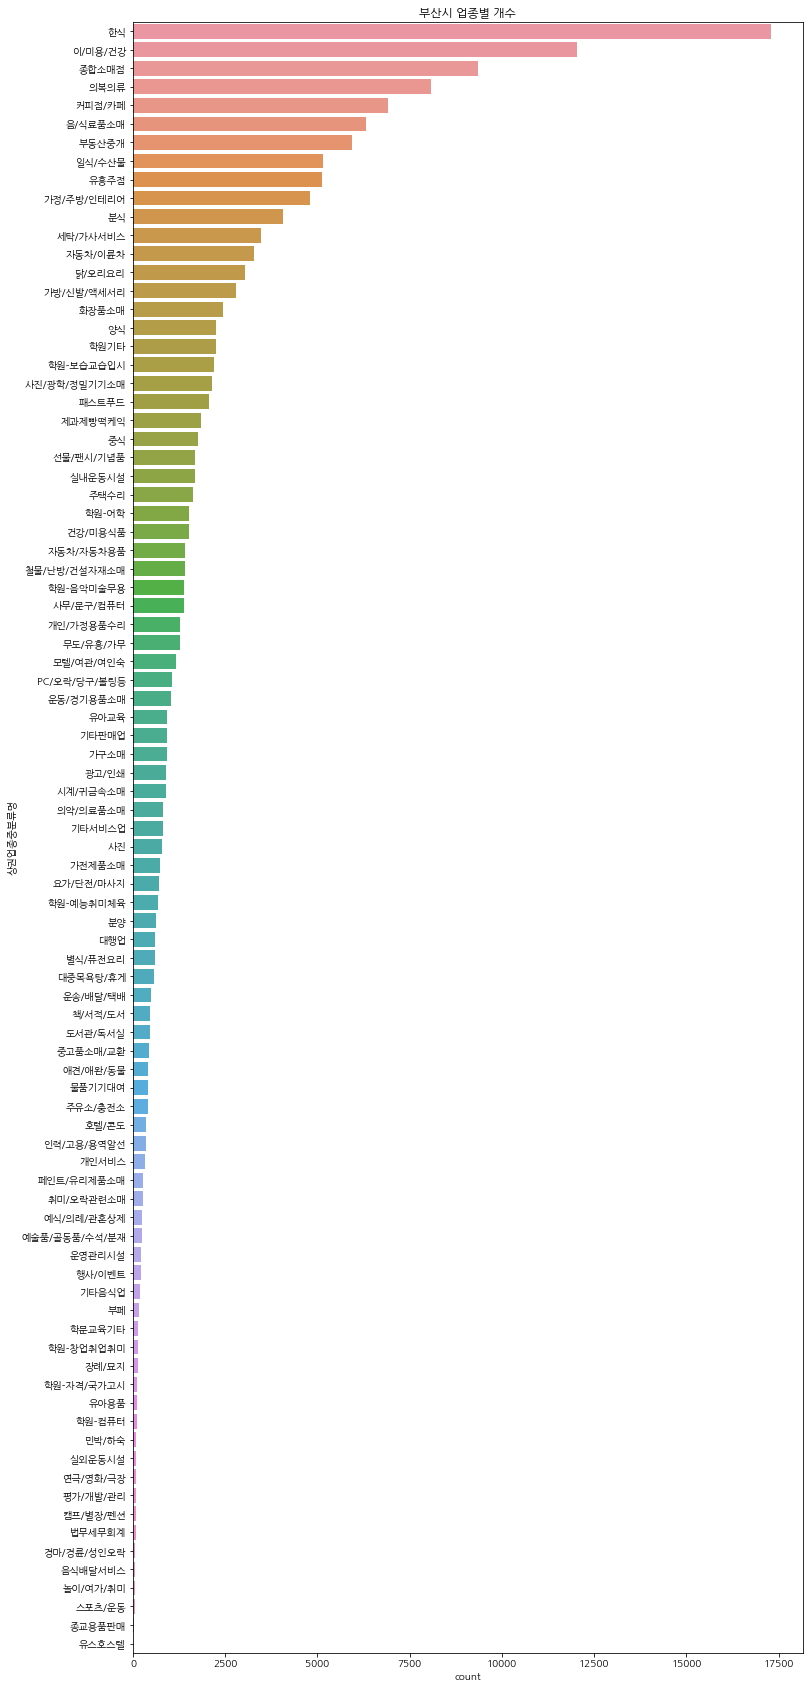

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'

plt.figure(figsize=(12, 30))
sns.countplot(y=df['상권업종중분류명'],
order = df['상권업종중분류명'].value_counts().index)
plt.title('부산시 업종별 개수')
plt.show()

## 2) 부산시 커피점/카페 업종수

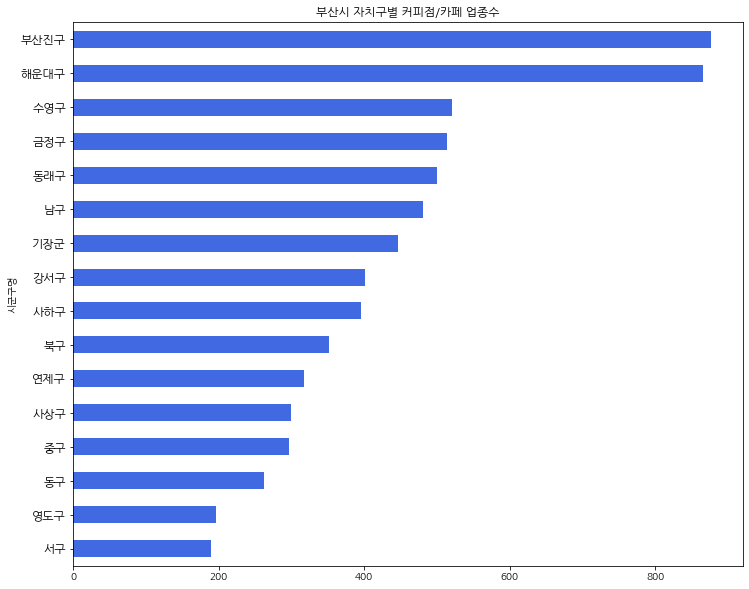

In [10]:
plt.figure(figsize=(12,10))
df_coffee.loc[df_coffee['상권업종중분류명'] == '커피점/카페'].groupby('시군구명')['상권업종대분류명'].count().sort_values().plot(kind='barh', color='royalblue')
plt.yticks(fontsize=12)
plt.title('부산시 자치구별 커피점/카페 업종수')
plt.show()

## 3) 부산시 자치구별 스타벅스 개수

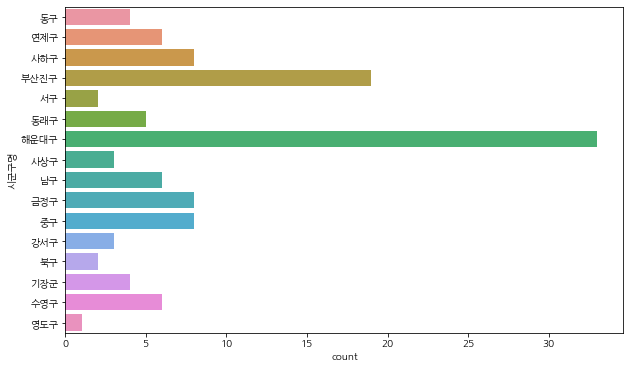

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df_sb, y='시군구명')
plt.show()

## 4) 스타벅스, 이디야 점포수 비교 차트

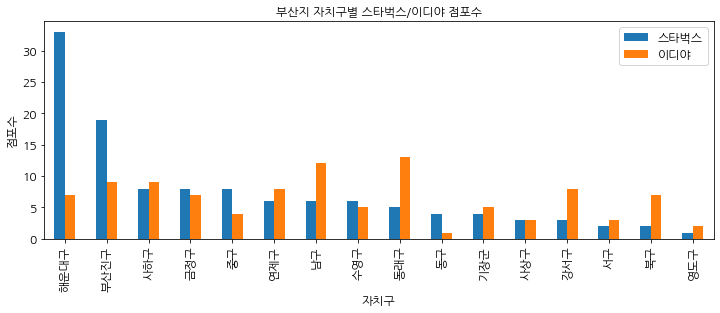

In [12]:
#차트 종류, 제목, 차트 크기, 범례, 폰트 크기 설정

ax = rs.plot(kind='bar', title='부산지 자치구별 스타벅스/이디야 점포수', figsize=(12, 4), legend=True, fontsize=12)
ax.set_xlabel('자치구', fontsize=12)          # x축 정보 표시
ax.set_ylabel('점포수', fontsize=12)     # y축 정보 표시
ax.legend(['스타벅스', '이디야'], fontsize=12)    # 범례 지정

## 5) 지도에서 행정 구역별 표시


### QGIS를 이용해서 부산시 자치구별 지도분할(geoson)

In [13]:
import json

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=11
)

geo_data = 'BUSAN_jmsong.geojson'

geo=''

with open(geo_data, mode='rt', encoding='utf-8') as f:
    geo = json.loads(f.read())

    f.close()
    
folium.GeoJson(
    geo,
    name='지역구'
).add_to(m)

m

## 6) 지점명이 Nan값인 데이터 처리하기

In [14]:
#Nan값을 '스타벅스 글자로 처리'
df_sb[['지점명','경도','위도']]
df_sb = df_sb.fillna('스타벅스')

#기장 해안로의 스타벅스 이름이 Nan값이었는데 tooltip을 보면 스타벅스로 표기되는 것을 볼 수 있음

#Nan값을 '스타벅스 글자로 처리'
df_ed[['지점명','경도','위도']]
df_ed = df_sb.fillna('EDIYA')

## 7) MarkerCluster

In [15]:
from folium.plugins import MarkerCluster

latitude = 35.13651365268311
longitude = 129.08423803765385 

m = folium.Map(
    location=[latitude, longitude],
    zoom_start=11
)

geo_data = 'BUSAN_jmsong.geojson'

geo=''

with open(geo_data, mode='rt', encoding='utf-8') as f:
    geo = json.loads(f.read())
    f.close()
    
folium.GeoJson(
    geo,
    name='지역구'
).add_to(m)


coords = df_coffee[['위도', '경도']]

marker_cluster = MarkerCluster().add_to(m)


#tooltip과 icon으로 구분, popup으로 지점명 표시
for lat, long, name in zip(df_sb['위도'], df_sb['경도'], df_sb['지점명']):
    folium.Marker([lat,long], icon = folium.Icon(icon='star', color='green'),
                  tooltip=name,
                  popup = f'<pre>스타벅스<br>{name}</pre>').add_to(marker_cluster)

for lat1, long1, name1 in zip(df_ed['위도'], df_ed['경도'], df_ed['지점명']):
    folium.Marker([lat1,long1], icon = folium.Icon(icon='home', color='blue'),
                  tooltip='이디야커피',
                  popup = f'<pre>EDIYA<br>{name1}</pre>').add_to(marker_cluster)
    
m

In [16]:
m.save('map_jmsong.html')